In [1]:
import numpy as np
import pandas as pd

Dataset from kaggle - credit card customer chur prediction  
(https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction?select=Churn_Modelling.csv)

It is the data of the bank, which have some (10000 rows) data of their customers.  
This data shows that, whether a person is still a customer of bank or not.

Reading the dataset

In [2]:
df = pd.read_csv("C:/Users/Hp/Downloads/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


RowNumber => no. of rows (1-10,000).  
CustomerId => Unique ID of a customer.  
Surname => surname of a customer.  
CreditScore => customer's credit score by the bank.  
Geography => Customer from which country: (France, German, Spain).  
Gender => Male or Female.  
Age => Age of the customer.  
Tenure => How many years he/she is a customer of the bank.  
Balance => Account balance.  
NumOfProducts => How many product of a bank, customer is using. Eg: credit card, debit card, FD, mutual funds, etc.  
HasCrCard => "1" - have credit card, "0" - not have credit card.  
IsActiveMember => "1" - Yes, "0" - No.  
EstimatedSalary => Customer's estimated salary by bank.  
Exited => "1" - Customer left the bank, "0" - Customer not left the bank.  

Have to predict "Exited"

Checking => type of columns, "null" values or not, contain duplicates or not.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

Now, will drop the unwanted columns/features from the dataset.  
i.e ; "RowNumber", "CustomerId", "Surname" .

In [6]:
df.drop(columns= ["RowNumber", "CustomerId", "Surname"], inplace= True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Now, will print unque values of features/columns.  
i.e; "Geography", "Gender", "NumOfProducts".

In [7]:
pd.crosstab(index= df["Geography"], columns= "count")

col_0,count
Geography,
France,5014
Germany,2509
Spain,2477


In [8]:
pd.crosstab(index= df["Gender"], columns= "count")

col_0,count
Gender,
Female,4543
Male,5457


In [9]:
pd.crosstab(index=df["NumOfProducts"], columns="count")

col_0,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


Will see count and percentage of customer who have left the bank.

In [10]:
print(df["Exited"].value_counts())
pd.crosstab(index=df["Exited"], columns="count", normalize=True)

Exited
0    7963
1    2037
Name: count, dtype: int64


col_0,count
Exited,
0,0.7963
1,0.2037


2037 customer have left the bank services i.e; 20.37 % of total  

Now, will convert categorical values to numerical value by using dummy function.  
As their is only 2 columns i.e; "Geography", "Gender"

In [11]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


We got the last three columns, in form of "True" and "False".  
Will replace the value to "1" and "0".

In [13]:
df.replace({False:0, True:1}, inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


Will check the relationship between all columns/features.

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt

Axes(0.125,0.11;0.62x0.77)


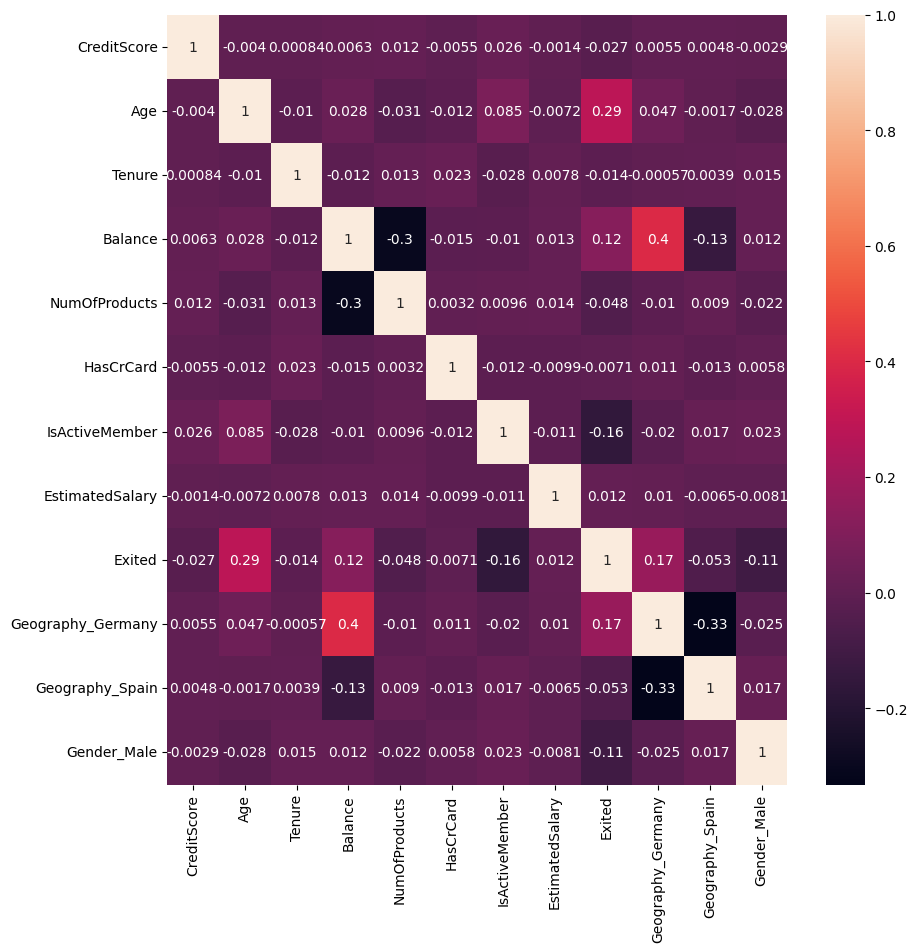

In [15]:
plt.figure(figsize=(10,10))
print(sn.heatmap(df.corr(), annot=True))

Now, will split the dataset into "Independent" and "Dependent" variables.

In [16]:
x = df.drop(columns=["Exited"], axis=0)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
y = df.iloc[:,8]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Will split the "x" and "y" into training and testing.

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

Now, Standardize the "x" and "y".

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_y_predict = lr.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
lr_accuracy = accuracy_score(y_test, lr_y_predict)
print(f"Accuracy by Logistic Regression: {lr_accuracy}")

Accuracy by Logistic Regression: 0.8076


In [23]:
lr_conf_mat = confusion_matrix(y_test, lr_y_predict)
lr_conf_mat

array([[1924,   79],
       [ 402,   95]], dtype=int64)

In [24]:
lr_cll_report = classification_report(y_test, lr_y_predict)
print(lr_cll_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.55      0.19      0.28       497

    accuracy                           0.81      2500
   macro avg       0.69      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500



Random Forest Classifier Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
rf_y_predict = rf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
rf_accuracy = accuracy_score(y_test, rf_y_predict)
print(f"Accuracy by Random Forest Classifier: {rf_accuracy}")

Accuracy by Random Forest Classifier: 0.8712


In [29]:
rf_conf_mat = confusion_matrix(y_test, rf_y_predict)
rf_conf_mat

array([[1934,   69],
       [ 253,  244]], dtype=int64)

In [30]:
rf_cll_report = classification_report(y_test, rf_y_predict)
print(rf_cll_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.49      0.60       497

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500



Comparision

In [31]:
print("Accuracy Score :")
print(f"Random Forest Classifier: {rf_accuracy}\t Logistic Regression: {lr_accuracy}")
print("-----------------------------")
print("Confusion Matrix:")
print(f"Random Forest Classifier: \n{rf_conf_mat}\nLogistic Regression:\n{lr_conf_mat}")
print("-----------------------------")
print("Classification Report")
print(f"Random Forest Classifier: \n{rf_cll_report}")
print(f"Logistic Regression: \n{lr_cll_report}")


Accuracy Score :
Random Forest Classifier: 0.8712	 Logistic Regression: 0.8076
-----------------------------
Confusion Matrix:
Random Forest Classifier: 
[[1934   69]
 [ 253  244]]
Logistic Regression:
[[1924   79]
 [ 402   95]]
-----------------------------
Classification Report
Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.49      0.60       497

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.55      0.19      0.28       497

    accuracy                           0.81      2500
   macro avg       0.69      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500



On compoarision we are getting more acuuracy in Random Forest Classifier than Logistic Regression